In [2]:
import sys
sys.path.append("..")
from tools import data_parser as dp
import joblib
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from statistics import mean
from randomforest import random_forest_CV
from data_visualisation import rf_vis
from sklearn.metrics import mean_absolute_error
from scipy import stats

In [3]:
bert_data_512 = "../data/combined_bert_df.csv"
bert_data_72 = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data_72)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [9]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 20)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = random_forest_CV.random_search(X_train, y_train, random_grid, 500, 5)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


In [10]:
random_forest_CV.eval_model(model, X_test, y_test)

(4.021184210526313,
 0.20007238026894947,
 (0.4582912751109531, 0.004940199822789481))

In [14]:
model

RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      n_estimators=190)

In [15]:
model = random_forest_CV.random_search(X_train, y_train, random_grid, 500, 5)
random_forest_CV.eval_model(model, X_test, y_test)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


(4.062256259271168,
 0.17966770017613243,
 (0.43358529829892584, 0.008247325533866319))

In [16]:
model

RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=48)

In [17]:
model = random_forest_CV.random_search(X_train, y_train, random_grid, 2000, 5)
random_forest_CV.eval_model(model, X_test, y_test)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


(4.073636463844794,
 0.15827138961359166,
 (0.4012795107842158, 0.015281769085156804))

In [18]:
model

RandomForestRegressor(bootstrap=False, max_depth=90, max_features='sqrt',
                      min_samples_leaf=4, n_estimators=48)

In [ ]:
bootstrap = False
max_depth=70
max_features=sqrt
n_estimators = 190

In [28]:
n_estimators = [190]
max_features = ['sqrt']
max_depth = [70]
min_samples_split = [2, 5, 10]
min_samples_leaf = [4, 6, 8]
bootstrap = [False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = random_forest_CV.random_search(X_train, y_train, random_grid, 500, 5)
random_forest_CV.eval_model(model, X_test, y_test)

C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=500. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


(4.053529866332494,
 0.19492467353714216,
 (0.453365185331933, 0.005488033947328362))

In [24]:
model

RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      min_samples_leaf=4, n_estimators=190)

AttributeError: 'function' object has no attribute 'savefig'

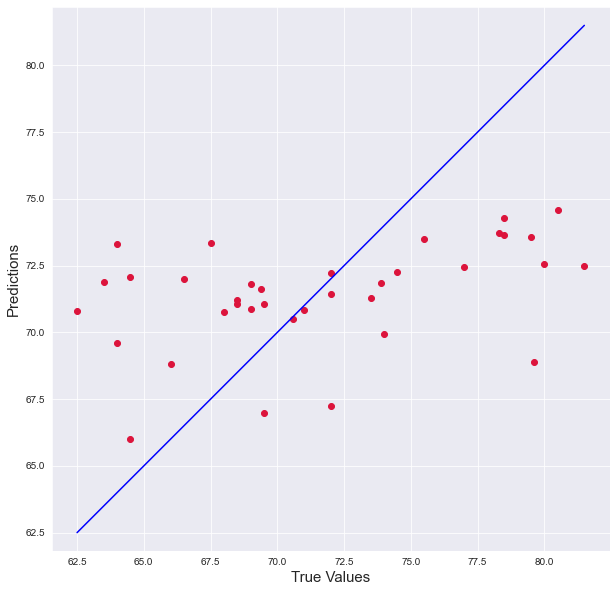

In [31]:
rf_vis.rf_plot(X_test, y_test, model)

In [33]:
mean(y_test)

71.57777777777778

In [35]:
random_forest_CV.eval_avg(y_test)

4.665432098765432

In [38]:
((4.66-4.05)/4.66)*100

13.090128755364812

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVR  # create the SVM model
model = SVR(kernel='rbf')
# define the parameter grid to search over
param_dist      = {'C': uniform(loc=0, scale=100), 'gamma': ['scale', 'auto'] + list(np.logspace(-5, 2, 8))}

# set up the randomized search
random_search   = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=500, cv=5, n_jobs=-1, verbose=5, random_state=28)

random_search.fit(X_train, y_train)
random_search.best_estimator_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


SVR(C=6.599732448376717)

In [48]:
from sklearn.metrics import r2_score

predictions = random_search.predict(X_test)
errors = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
pearsonr = stats.pearsonr(y_test, predictions)

print(np.mean(errors))
print (r2)
print(pearsonr[0])

4.269568360688333
0.1357872935433847
0.3751009912030001


In [49]:
random_forest_CV.eval_avg(y_test)

4.665432098765432

In [46]:
((4.66-4.26)/4.66)*100

8.58369098712447